In [2]:
import pandas as pd
fulldata=pd.read_csv("listings.csv")

dc_listings=fulldata[["accommodates","bedrooms","bathrooms","beds","price","minimum_nights","maximum_nights","number_of_reviews"]]
print(dc_listings.columns)
print(dc_listings.shape)

def stripped_commas(x):
    x=x.replace("$","")
    x=x.replace(",","")
    return float(x)


dc_listings=dc_listings.dropna(axis=0,subset=["accommodates","bedrooms","beds","bathrooms","price"])

dc_listings["price"]=dc_listings["price"].apply(stripped_commas)
prices=dc_listings["price"]
#dc_listings=(dc_listings-dc_listings.mean())/dc_listings.std()
dc_listings["price"]=prices
print(dc_listings.shape)
print(dc_listings.iloc[0:5])

Index(['accommodates', 'bedrooms', 'bathrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'number_of_reviews'],
      dtype='object')
(3723, 8)
(3671, 8)
   accommodates  bedrooms  bathrooms  beds  price  minimum_nights  \
0             4       1.0        1.0   2.0  160.0               1   
1             6       3.0        3.0   3.0  350.0               2   
2             1       1.0        2.0   1.0   50.0               2   
3             2       1.0        1.0   1.0   95.0               1   
4             4       1.0        1.0   1.0   50.0               7   

   maximum_nights  number_of_reviews  
0            1125                  0  
1              30                 65  
2            1125                  1  
3            1125                  0  
4            1125                  0  


In [3]:
import string
import numpy as np
from scipy.spatial import distance

def distance(x,param):
    return abs(x-param)

def getdistance(dc_listings,new_listing,dimensions):
    distance_series=pd.Series(np.zeros(len(dc_listings.index)))
    for key in dimensions:
        new_series=dc_listings[key].apply(distance,param=new_listing.get(key)).copy()
        distance_series=np.add(distance_series,new_series)
    return distance_series

def predict_price(row):        
    np.random.seed(1)
    temp_df=train_df.copy()
    temp_df["distance"]=getdistance(temp_df,row,dimensions).copy()
    temp_df=temp_df.loc[np.random.permutation(len(dc_listings.index))]
    temp_df=temp_df.sort_values(["distance"]).copy()
    mean_price=np.mean(temp_df["price"][0:5])
    return mean_price  
    
   


train_df=dc_listings[0:2792].copy()
test_df=dc_listings[2792:].copy()
print(train_df.shape)
print(test_df.shape)

(2792, 8)
(879, 8)


In [4]:
new_lisiting={"accommodates":5,"bedrooms":5.0,"bathrooms":1.5,"beds":5,"latitude":38.890046,"longitude":-77.002808 }

dimensions=["bathrooms","bedrooms","accommodates","beds","minimum_nights","maximum_nights","number_of_reviews"]
test_df["predict_price"]=test_df.apply(predict_price,axis=1)
test_df["squared_error"]=(test_df["predict_price"]-test_df["price"])**2
mse = test_df['squared_error'].mean()
rmse=np.sqrt(mse)
print(rmse)

151.337240957


In [5]:
import sklearn.neighbors as skn
import sklearn.metrics as metric
import numpy as np
hyper_params=list(range(21))
mse_values=[]
hyper_params.remove(0)
for i in hyper_params:
    knn= skn.KNeighborsRegressor(n_neighbors=i)
    dimensions=["bathrooms","bedrooms","accommodates","beds","minimum_nights","maximum_nights","number_of_reviews"]
    dimensions=list(dc_listings.columns)
    dimensions.remove("price")
    train_df=dc_listings[0:2792].copy()
    test_df=dc_listings[2792:].copy()
    train_features=train_df.loc[:][dimensions]
    test_features=test_df.loc[:][dimensions]
    train_target=train_df.loc[:]["price"]
    test_target=test_df.loc[:]["price"]
    knn.fit(train_features,train_target)
    predictions=knn.predict(test_features)
    rmse=np.sqrt(metric.mean_squared_error(test_target,predictions))
    mse_values.append(rmse)
print(np.min(mse_values))    

105.820143983


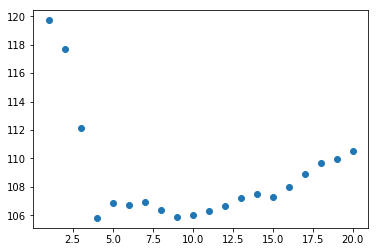

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
ax.scatter(hyper_params,mse_values)
plt.show()